importar librerias

In [83]:
from roboticstoolbox import DHRobot,RevoluteDH,PrismaticDH
import roboticstoolbox as rtb
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from spatialmath import *

importar el robot de la libreria y visualizarlo

In [84]:
import roboticstoolbox as rtb
robot = rtb.models.UR5()

 descripción de este robot

In [85]:
print(robot)
print(robot.links)
print(robot.qr)

ERobot: UR5 (by Universal Robotics), 6 joints (RRRRRR), 2 branches, dynamics, geometry, collision
┌───┬────────────────┬───────┬────────────────┬──────────────────────────────────────────────────────────────────────┐
│id │      link      │ joint │     parent     │                                 ETS                                  │
├───┼────────────────┼───────┼────────────────┼──────────────────────────────────────────────────────────────────────┤
│11 │ world          │       │ BASE           │ {world} = {BASE}                                                     │
│ 1 │ base_link      │       │ world          │ {base_link} = {world}                                                │
│ 2 │ shoulder_link  │     0 │ base_link      │ {shoulder_link} = {base_link} ⊕ tz(0.08916) ⊕ Rz(q0)                 │
│ 3 │ upper_arm_link │     1 │ shoulder_link  │ {upper_arm_link} = {shoulder_link} ⊕ ty(0.1358) ⊕ Ry(90°) ⊕ Ry(q1)   │
│ 4 │ forearm_link   │     2 │ upper_arm_link │ {forearm_link} = {upp

In [5]:
robot.plot(robot.qr,backend='swift',block=True)

KeyboardInterrupt: 

In [86]:
print(robot.qz)
robot.plot(robot.qz)

[0. 0. 0. 0. 0. 0.]


Swift backend, t = 0.05, scene:
  UR5

In [87]:
print(robot.qz)
T = robot.fkine(robot.qz)#posicion inicial gripper
T

[0. 0. 0. 0. 0. 0.]


   0         1         0         0.8173    
   1         0         0         0.1915    
   0         0        -1        -0.005491  
   0         0         0         1         


In [88]:
sol2=robot.ikine_LM(T,mask=[1,1,1,0,0,0]) #posicion inicial motores
#print(sol2)
if sol2.success:
    print(robot.fkine(sol2.q))#verifica que de igual a la posicion del gripper
   
else:
    print("solution not available")

   0         1         0         0.8173    
   1         0         0         0.1915    
   0         0        -1        -0.005491  
   0         0         0         1         



describir la trayectoria que el robot debe seguir para que haga la letra J

In [89]:
ti=100
punto1=SE3(  x=300, y=255, z=200 )
punto2=SE3(  x=300, y=255, z=85)
punto3=SE3( x=370, y=255, z=85 )
punto4=SE3( x=370, y=255, z=600 )
punto5=SE3( x=340, y=255, z=600 )
punto6=SE3( x=390, y=255, z=600 )

In [90]:
x1=rtb.ctraj(punto4, punto3, 133)
x2=rtb.ctraj(punto3, punto2, 133)
x3=rtb.ctraj(punto2, punto1, 133)
x4=rtb.ctraj(punto5, punto6, 133)

imprime las cordenadas cartesianas 

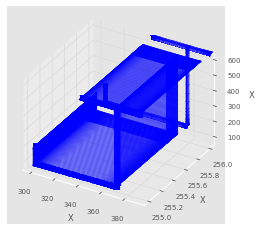

In [91]:
x1.plot()
x2.plot()
x3.plot()
x4.plot()

se pasan las coordenadas de mm a cm, y se calculan nuevamente las coordenadas cartesianas

In [93]:
P1=SE3(x=3.0,y=2.5,z=2.0)
P2=SE3(x=3.0,y=2.5,z=0.8)
P3=SE3(x=3.7,y=2.5,z=0.8)
P4=SE3(x=3.7,y=2.5,z=6.0)
P5=SE3(x=3.4,y=2.5,z=6.0)
P6=SE3(x=3.9,y=2.5,z=6.0)


In [94]:
TrayC1=rtb.ctraj(P4, P3, 50)
TrayC2=rtb.ctraj(P3, P2, 50)
TrayC3=rtb.ctraj(P2, P1, 50)
TrayC4=rtb.ctraj(P5, P6, 50)

se calcula la cinematica inversa, para obtener los valores que debe tomar cada una de las articulaciones

In [95]:
InvertrayecC1=robot.ikine_min(TrayC1)
InvertrayecC2=robot.ikine_min(TrayC2)
InvertrayecC3=robot.ikine_min(TrayC3)
InvertrayecC4=robot.ikine_min(TrayC4)

In [97]:
print(InvertrayecC1)
print(InvertrayecC4)

[IKsolution(q=array([-2.31353637e+00, -3.23410319e+05, -3.23408114e+05, -3.23402797e+05,  8.25361189e-01, -3.23408093e+05]), success=True, reason='Optimization terminated successfully', iterations=37, residual=22.95138332020325), IKsolution(q=array([-2.31364208e+00, -3.23410320e+05, -3.23408114e+05, -3.23402796e+05,  8.25441913e-01, -3.23408093e+05]), success=True, reason='Optimization terminated successfully', iterations=12, residual=22.923787857843635), IKsolution(q=array([-2.31395876e+00, -3.23410321e+05, -3.23408114e+05, -3.23402796e+05,  8.25683370e-01, -3.23408093e+05]), success=True, reason='Optimization terminated successfully', iterations=18, residual=22.841151218108237), IKsolution(q=array([-2.31448646e+00, -3.23410323e+05, -3.23408114e+05, -3.23402794e+05,  8.26086498e-01, -3.23408093e+05]), success=True, reason='Optimization terminated successfully', iterations=15, residual=22.70392253809896), IKsolution(q=array([-2.31522465e+00, -3.23410326e+05, -3.23408114e+05, -3.2340279



aplicando el metodo "jtraj", se calcula un polinomio de grado 5 para cada articulacion 

In [98]:

Trayec1 = rtb.jtraj(InvertrayecC1[0].q, InvertrayecC1[-1].q, 100)
Trayec2 = rtb.jtraj(InvertrayecC2[0].q, InvertrayecC2[-1].q, 100)
Trayec3 = rtb.jtraj(InvertrayecC3[0].q, InvertrayecC3[-1].q, 100)
Trayec4 = rtb.jtraj(InvertrayecC4[0].q, InvertrayecC4[-1].q, 100)

visualizacion animada del robot 

In [101]:
robot.plot(Trayec1.q,block=False)

robot.plot(Trayec2.q,block=False)

robot.plot(Trayec3.q,block=False)

robot.plot(Trayec4.q,block=False)

Swift backend, t = 4.99999999999999, scene:
  UR5